In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df[:5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

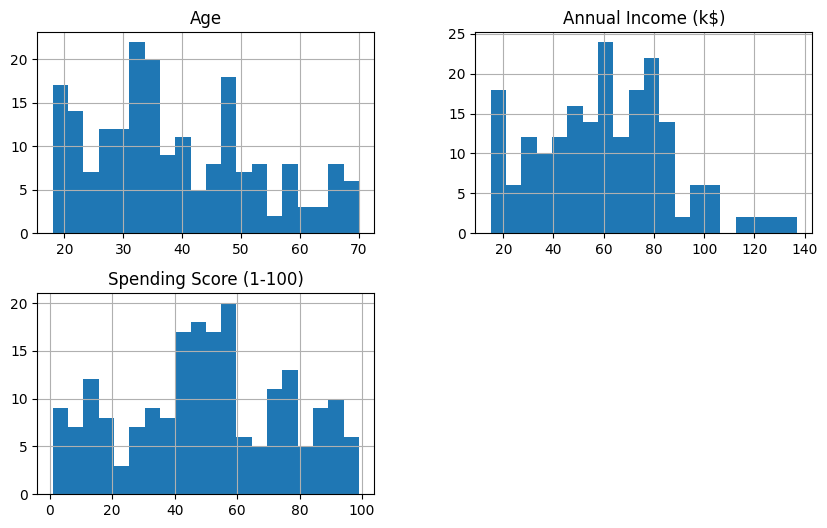

In [8]:
data = df.drop('CustomerID', axis = 1)
data.hist(bins = 20, figsize = (10, 6));

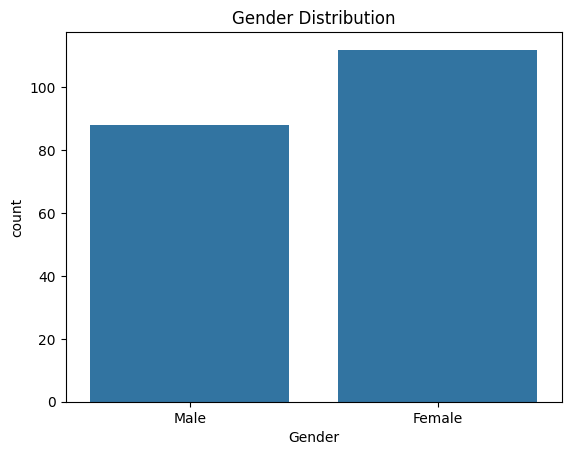

In [9]:
sns.countplot(x = 'Gender', data = data)
plt.title("Gender Distribution")
plt.show()

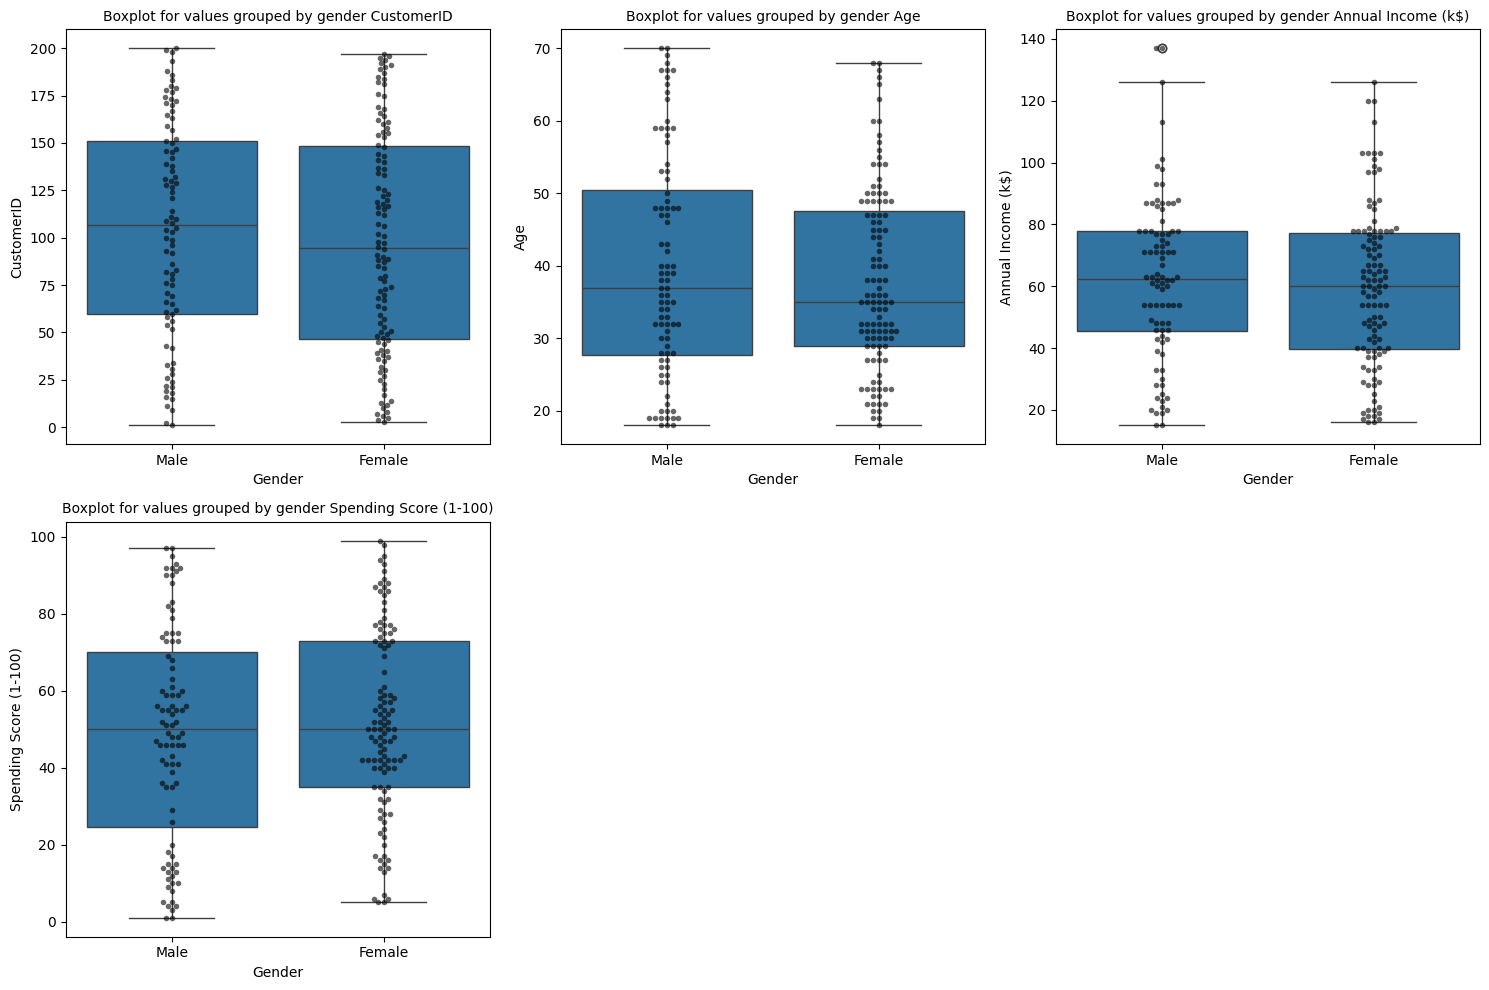

In [10]:
data2 = df.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(15, 10)) 


for i, col in enumerate(data2):
    plt.subplot(2, len(data2) // 2 + 1, i + 1)  
    sns.boxplot(x='Gender', y=col, data=df)
    sns.swarmplot(x='Gender', y=col, data=df, color='black', size=4, alpha=0.6)
    plt.title(f'Boxplot for values grouped by gender {col}', fontsize = 10)


plt.tight_layout()
plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Handling Object 

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
encoder = OneHotEncoder(sparse_output = False, drop = None)

In [65]:
# Fit and transform the Gender column
encoder_gender = encoder.fit_transform(df[['Gender']])

#create a dataframe with the encoded data and set column names as well
encoded_gender_df = pd.DataFrame(encoder_gender, columns = encoder.get_feature_names_out(['Gender']))

#convert the encoded data into int as ohe converts it into float value
encoded_gender_df = encoded_gender_df.astype('int64')

#lastly concat the new dataframe with the original df, drop the original gender column
df_encoded = pd.concat([df.drop('Gender', axis = 1), encoded_gender_df], axis = 1)

df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [68]:
df3 = df_encoded.drop('CustomerID', axis = 1)

In [69]:
df3

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_Female           200 non-null    int64
 4   Gender_Male             200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


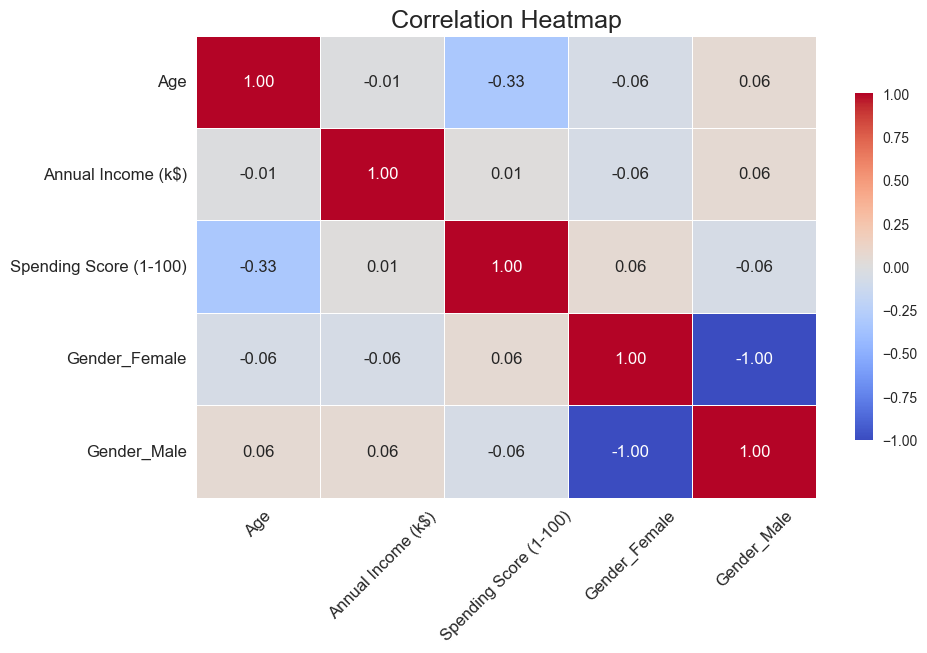

In [71]:
corr_matrix = df3.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '0.2f', linewidth = .5, cbar_kws={"shrink": 0.75})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Scatter Plots

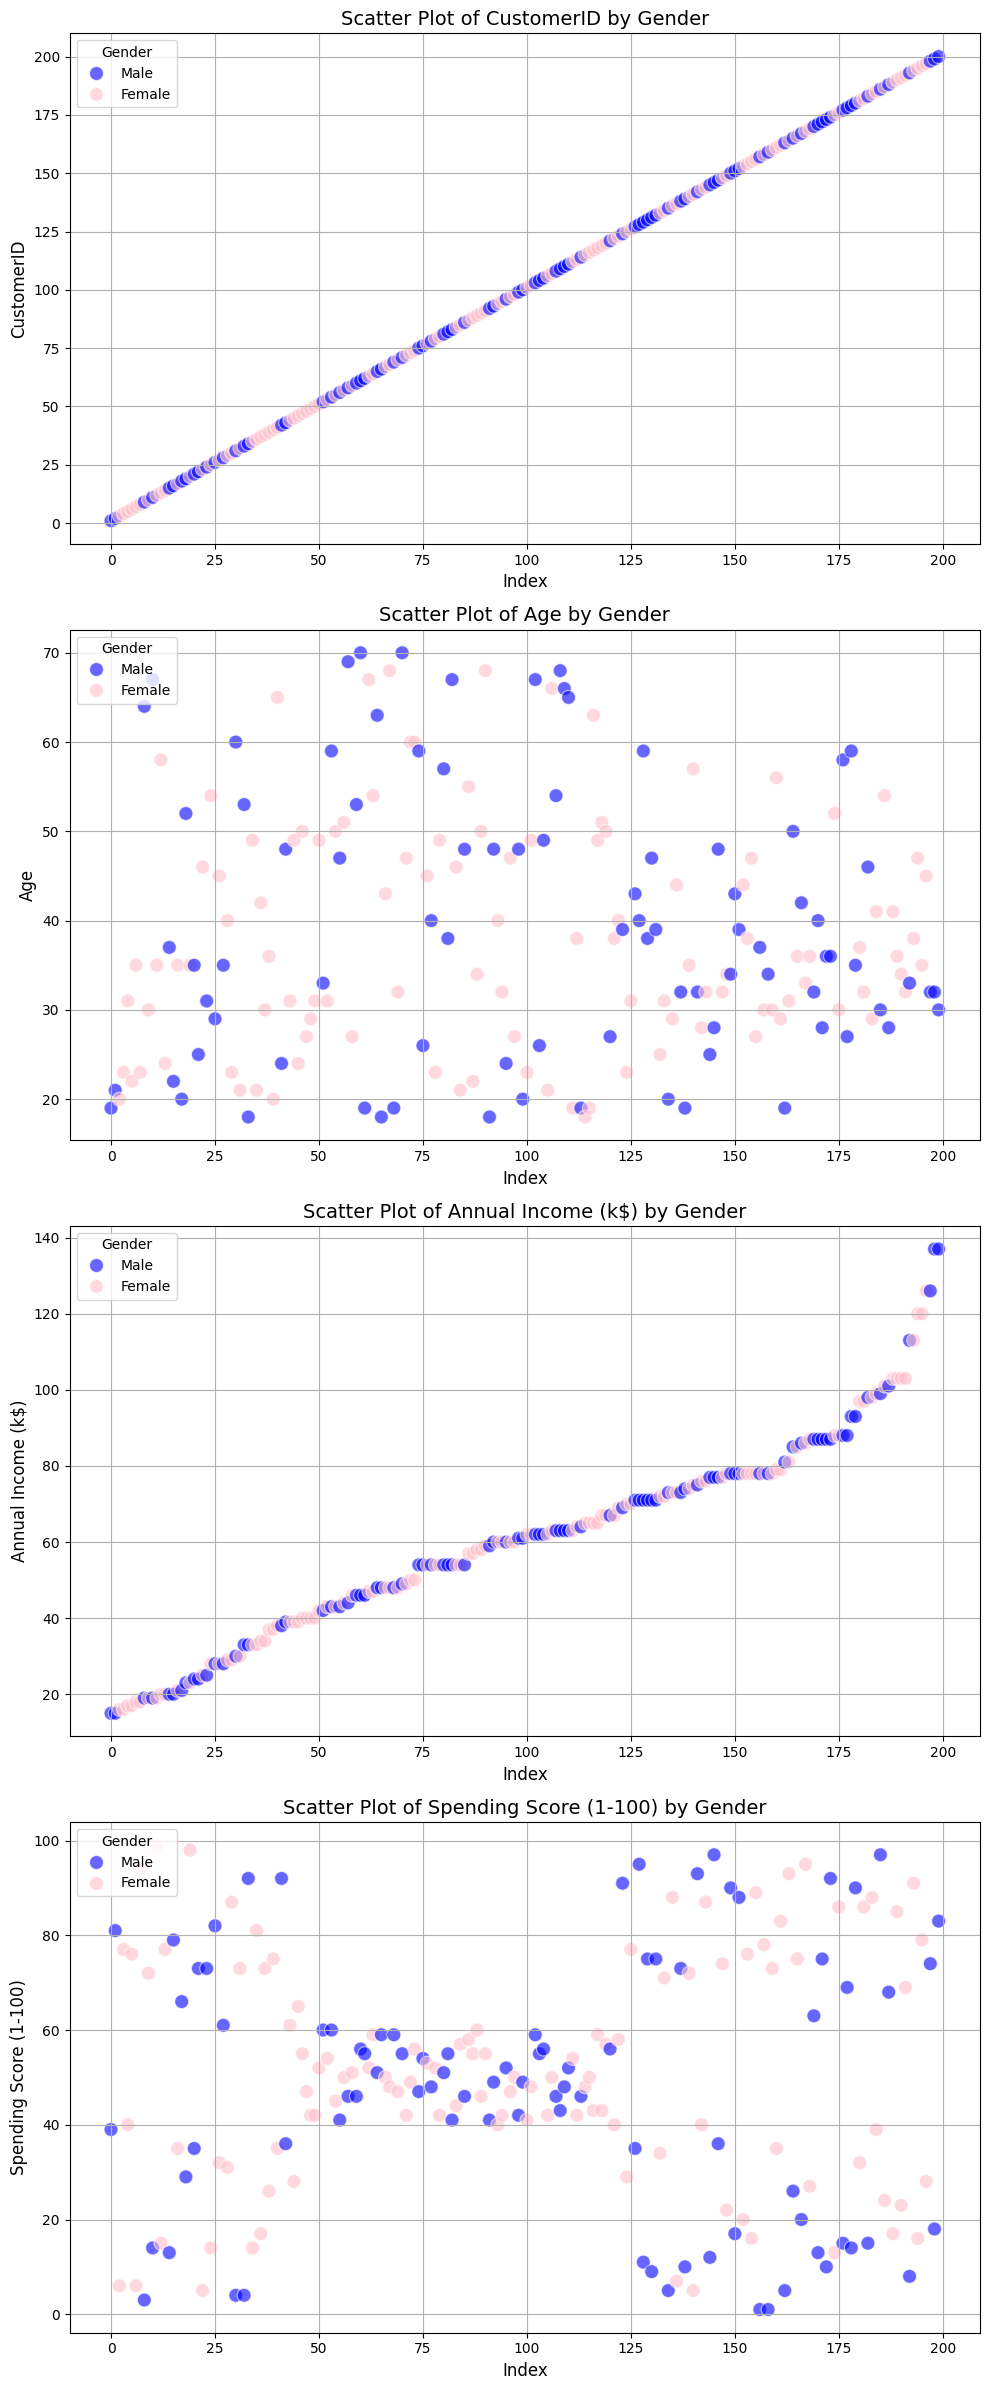

In [16]:
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns
plt.figure(figsize=(10, len(numerical_columns) * 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.scatterplot(x=data.index, y=df[col], hue=df['Gender'], palette={'Male': 'blue', 'Female': 'pink'}, s=100, alpha=0.6)
    plt.title(f'Scatter Plot of {col} by Gender', fontsize=14)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(True)
    plt.legend(title='Gender', loc='upper left')

plt.tight_layout()
plt.show()

In [17]:
numerical_columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Model Building

In [84]:
df4 = df.drop(columns=['CustomerID'],axis=1)

In [85]:
df5 = df4.copy()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df5[df5.select_dtypes(include = 'object').columns] = df5.select_dtypes(include = 'object').apply(le.fit_transform)
df5.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,0
4,0,31,17,40,2


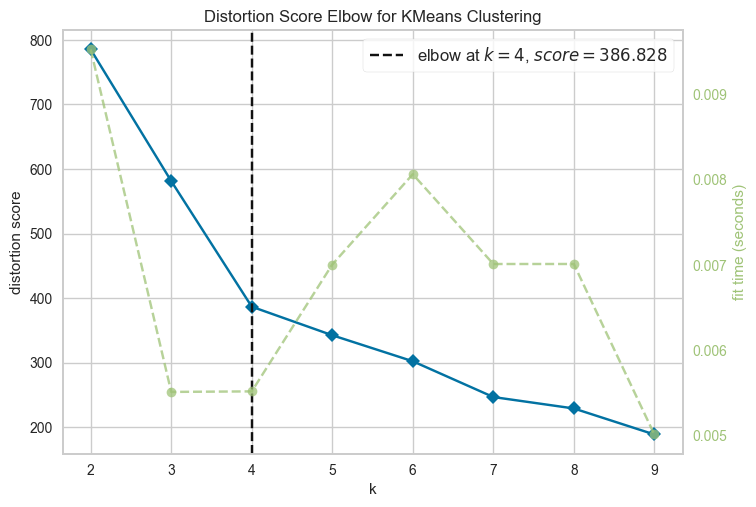

In [101]:
scaler = StandardScaler()
x = scaler.fit_transform(df5)

model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model, k = (2, 10))
visualizer.fit(x)
visualizer.show()
plt.show()

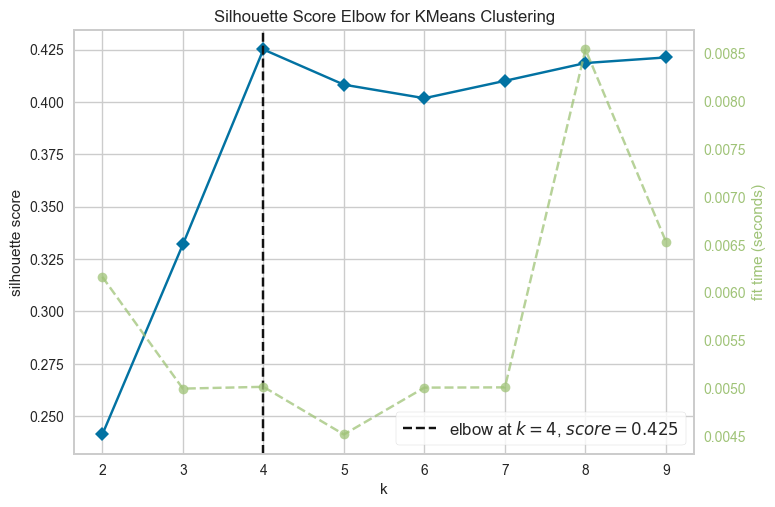

In [112]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(x)
visualizer.show()
plt.show()

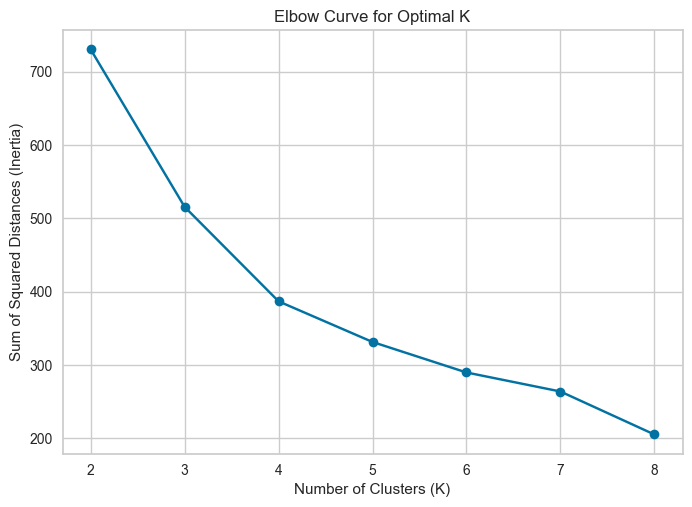

In [113]:
range_clusters = range(2, 9)
ssd = []
for cluster in range_clusters:
    kmeans = KMeans(n_clusters= cluster, max_iter=50, random_state=42)
    kmeans.fit(x)
    ssd.append(kmeans.inertia_)

plt.plot(range_clusters, ssd, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [114]:
# So K = 4 is the optimal number of clusters

In [117]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
df5['Cluster'] = kmeans.fit_predict(x)

print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("\nCluster Sizes:")
print(df5['Cluster'].value_counts())

cluster_summary = df5.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

Cluster Centers:
[[ 1.12815215  0.75982983  0.07086791 -0.81492926 -0.36514837]
 [-0.88640526 -0.75047453 -0.00501655  0.6979562  -1.2780193 ]
 [ 1.12815215 -0.76072691  0.05496398  0.83369302  1.46059349]
 [-0.88640526  0.64256818 -0.09498735 -0.59494042  0.54772256]]

Cluster Sizes:
Cluster
3    56
1    56
0    48
2    40
Name: count, dtype: int64

Cluster Summary:
         Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                  
0           1.0  49.437500           62.416667               29.208333   
1           0.0  28.392857           60.428571               68.178571   
2           1.0  28.250000           62.000000               71.675000   
3           0.0  47.803571           58.071429               34.875000   

         cluster  clusters  
Cluster                     
0            1.0       0.0  
1            0.0       1.0  
2            3.0       2.0  
3            2.0       3.0  


In [120]:
from mpl_toolkits.mplot3d import Axes3D

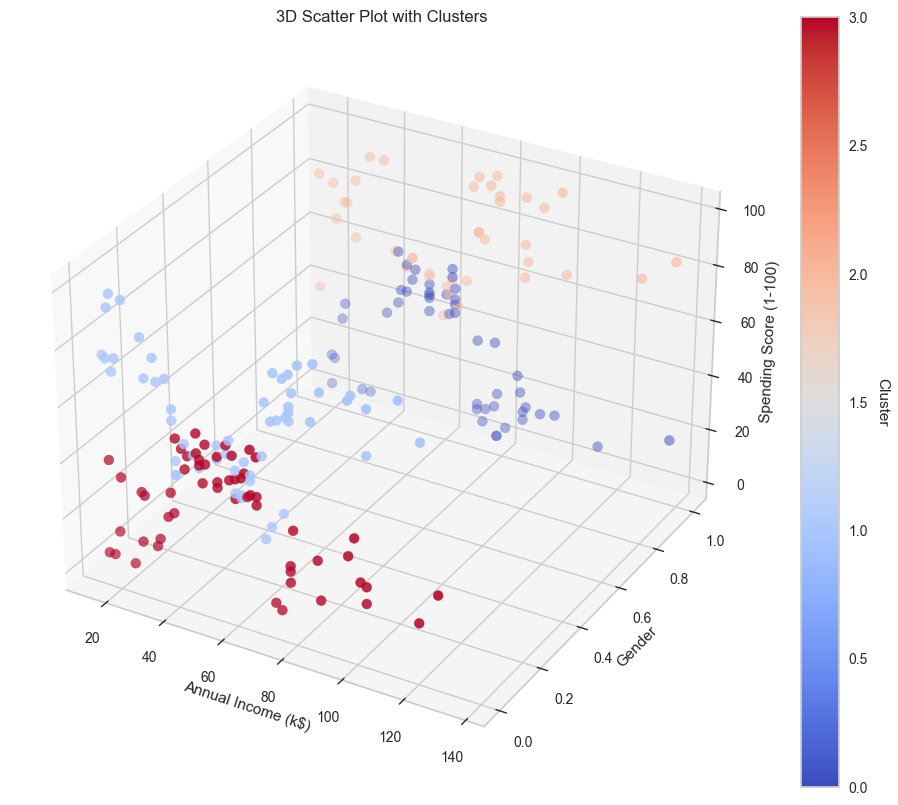

In [123]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection = '3d')

scatter = ax.scatter(
    df5['Annual Income (k$)'],
    df5['Gender'],
    df5['Spending Score (1-100)'],
    c=df5['cluster'], cmap = 'coolwarm', s = 50
)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Gender')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster', rotation=270, labelpad=15)

plt.show()